Preparing data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("mobile_price_classification (1).csv")
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Checking for nan values

data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [5]:
# Splitting the data into features and target

x = data.drop('price_range', axis=1)
y = data['price_range']

In [7]:
y.unique()

array([1, 2, 3, 0])

In [8]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
# onehot encoding the target to fit the shape
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [32]:
# Creating the model

from tensorflow.keras import Sequential, layers

#defining the model

model = Sequential([
    layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

# compiling the model with with loss function as catgorical_crossentropy and optimizer as adam

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# fitting the data into model

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))



Epoch 1/20
50/50 [==============================] - 2s 7ms/step - loss: 67.3866 - accuracy: 0.3988 - val_loss: 14.8747 - val_accuracy: 0.4500
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 6.8785 - accuracy: 0.5412 - val_loss: 4.5550 - val_accuracy: 0.5575
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 6.6763 - accuracy: 0.5256 - val_loss: 4.5686 - val_accuracy: 0.6075
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 5.1947 - accuracy: 0.5619 - val_loss: 3.4852 - val_accuracy: 0.6100
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 3.9988 - accuracy: 0.5850 - val_loss: 3.2052 - val_accuracy: 0.5950
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 4.4006 - accuracy: 0.5825 - val_loss: 3.5917 - val_accuracy: 0.6025
Epoch 7/20
50/50 [==============================] - 0s 3ms/step - loss: 4.8193 - accuracy: 0.5969 - val_loss: 2.8046 - val_accuracy: 0.6150
Epoch 8/20
50/50 [

In [33]:
# Evaliting the model
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1.9929 - accuracy: 0.6775


[1.9929107427597046, 0.6775000095367432]

In [39]:

y_pred = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


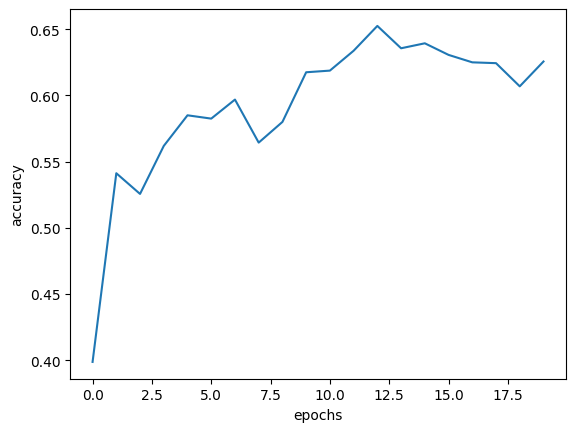

In [44]:
# rounding the predictions
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

# plotting the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()